### Data Preprocessing

- As can be seen in the previous notebook, located in the notebooks folder, an exploratory analysis of the data was carried out. In this notebook, the preprocessing of the data will be carried out in order to train a classification model.


In [1]:
# to install the necessary packages, run the following command:

_ = !pip install -r ../requirements.txt

In [2]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Load dataset

- Load the dataset from a csv file.

In [3]:
# load data
df = pd.read_csv('../src/data/raw/train.csv', sep=';') 

print(f"The Dataframe shape is: {df.shape}, so we have {df.shape[0]} rows and {df.shape[1]} columns.")

#checking the first 5 rows
print(f"The first 5 rows are:")

df.head(5)

The Dataframe shape is: (13186, 34), so we have 13186 rows and 34 columns.
The first 5 rows are:


,ID,days_diff,number_words_title,number_words_content,number_unique_words,number_no_stopwords,number_no_stopwords_unique,number_links,number_images,number_videos,...,maximum_bias_positive_words,average_bias_negative_words,minimum_bias_negative_words,maximum_bias_negative_words,subjectivity_title,sentiment_title,abs_title_sentiment_polarity,weekday,category,views
0,1,731,11,1089,0.418692,1.0,0.553468,20,20,0,...,1.0,-0.231548,-0.5,-0.050000,0.000000,0.000000,0.000000,monday,tech,1200
1,2,731,12,682,0.459542,1.0,0.634961,10,1,0,...,0.6,-0.220150,-0.6,-0.050000,0.750000,-0.250000,0.250000,monday,world,1600
2,3,731,8,397,0.624679,1.0,0.805668,11,1,0,...,1.0,-0.144643,-0.2,-0.100000,0.000000,0.000000,0.000000,monday,bus,3100
3,4,731,5,356,0.618234,1.0,0.766234,3,12,1,...,1.0,-0.372619,-0.7,-0.071429,0.454545,0.136364,0.136364,monday,entertainment,631
4,5,731,6,174,0.691860,1.0,0.902913,0,1,0,...,0.6,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,monday,tech,401


### 1 - Handling missing values

In [4]:
#printing the number of missing values per column in a table format
tmp = pd.DataFrame(df.isnull().sum())
tmp.columns = ['Missing values']
print(f"the total number of missing values is: {tmp['Missing values'].sum()}")
print(f"The number of missing values per column is:")
tmp.T

the total number of missing values is: 0
The number of missing values per column is:


,ID,days_diff,number_words_title,number_words_content,number_unique_words,number_no_stopwords,number_no_stopwords_unique,number_links,number_images,number_videos,...,maximum_bias_positive_words,average_bias_negative_words,minimum_bias_negative_words,maximum_bias_negative_words,subjectivity_title,sentiment_title,abs_title_sentiment_polarity,weekday,category,views
Missing values,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


There is no missing values in dataset

### 2 - Detect numerical and categorical variables

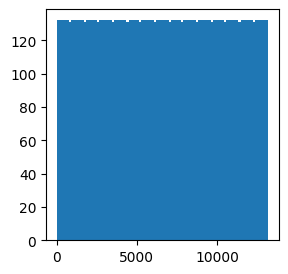

In [4]:
# - Checking if the id column has no important information

#set the figure size
plt.figure(figsize=(3, 3))
plt.hist(df['ID'], bins=100)
plt.show()

In [5]:
import re

# define target column, and retrieve list of attributes from the dataframe
id_cols = ['ID'] #If the dataset has an ID column, it should be included here because it will not be used in the model
target_col = 'views'
categ_cols = [] #If the dataset has known categorical columns, they should be included here
other_cols = [] #If the dataset has other columns that should not be included in the model, they should be included here

feature_cols = [x for x in df.columns.tolist() if x not in id_cols + other_cols + [target_col]]

numeric_features = [x for x in feature_cols if df[x].dtype != 'object' and not re.match('(^has_)', x) and x not in categ_cols]

categorical_features = [x for x in feature_cols if x not in numeric_features]

# check feature columns
print("Description of the feature columns: \n")
print('Number of feature cols: {}'.format(len(feature_cols)))
print('Number of categoric features: {}'.format(len(categorical_features)))
print('Number of numeric features: {} \n'.format(len(numeric_features)))
print('The numeric features are: \n {} \n'.format(numeric_features))
print('The categorical features are: \n {}'.format(categorical_features))

Description of the feature columns: 

Number of feature cols: 32
Number of categoric features: 2
Number of numeric features: 30 

The numeric features are: 
 ['days_diff', 'number_words_title', 'number_words_content', 'number_unique_words', 'number_no_stopwords', 'number_no_stopwords_unique', 'number_links', 'number_images', 'number_videos', 'average_word_length', 'number_of_keywords', 'score_topic_1', 'score_topic_2', 'score_topic_3', 'score_topic_4', 'score_topic_5', 'degree_of_subjectivity', 'degree_of_sentiment', 'pct_positive_words', 'pct_negative_words', 'pct_positive_words_over_sentiment_words', 'average_bias_positive_words', 'minimum_bias_positive_words', 'maximum_bias_positive_words', 'average_bias_negative_words', 'minimum_bias_negative_words', 'maximum_bias_negative_words', 'subjectivity_title', 'sentiment_title', 'abs_title_sentiment_polarity'] 

The categorical features are: 
 ['weekday', 'category']


### 3 - Analyze and Preprocessing numerical variables

In [6]:
print("Description of the numerical columns:")

df[numeric_features].describe().T

Description of the numerical columns:


,count,mean,std,min,25%,50%,75%,max
days_diff,13186.0,593.432504,82.812932,449.000000,521.000000,595.000000,667.000000,731.000000
number_words_title,13186.0,9.814879,1.964785,2.000000,8.000000,10.000000,11.000000,18.000000
number_words_content,13186.0,501.993554,421.588436,0.000000,228.000000,372.000000,646.000000,6336.000000
number_unique_words,13186.0,0.558257,0.118062,0.000000,0.486147,0.558198,0.632353,1.000000
number_no_stopwords,13186.0,0.992340,0.087187,0.000000,1.000000,1.000000,1.000000,1.000000
number_no_stopwords_unique,13186.0,0.700876,0.120197,0.000000,0.640398,0.706280,0.772727,1.000000
number_links,13186.0,10.531473,10.548145,0.000000,4.000000,7.000000,13.000000,171.000000
number_images,13186.0,3.875626,7.889616,0.000000,1.000000,1.000000,1.000000,99.000000
number_videos,13186.0,1.208099,4.264581,0.000000,0.000000,0.000000,1.000000,74.000000
average_word_length,13186.0,4.631731,0.493426,0.000000,4.473356,4.644974,4.833333,6.308411


- We analyze the correlation between the numerical variables of the dataset, to see if there are variables that are highly correlated, and therefore can be eliminated.

In [7]:
# analyze the correlation between the features to remove the features with high correlation
corr = df[numeric_features].corr()
corr.style.background_gradient(cmap='coolwarm')

,days_diff,number_words_title,number_words_content,number_unique_words,number_no_stopwords,number_no_stopwords_unique,number_links,number_images,number_videos,average_word_length,number_of_keywords,score_topic_1,score_topic_2,score_topic_3,score_topic_4,score_topic_5,degree_of_subjectivity,degree_of_sentiment,pct_positive_words,pct_negative_words,pct_positive_words_over_sentiment_words,average_bias_positive_words,minimum_bias_positive_words,maximum_bias_positive_words,average_bias_negative_words,minimum_bias_negative_words,maximum_bias_negative_words,subjectivity_title,sentiment_title,abs_title_sentiment_polarity
days_diff,1.000000,-0.032912,-0.056148,0.037609,-0.006295,0.041229,-0.098130,-0.051603,0.012672,-0.018736,-0.091366,-0.003070,0.023335,-0.010313,0.001940,-0.007460,-0.014808,0.007693,0.012279,0.002831,-0.001582,-0.018195,0.000437,-0.051322,0.025414,0.036662,-0.002157,-0.001029,0.014578,0.006488
number_words_title,-0.032912,1.000000,-0.050258,0.060497,0.017401,0.052066,-0.075646,0.001910,0.063054,-0.049688,-0.009188,-0.043534,0.052278,-0.026231,0.076377,-0.048819,-0.019552,-0.039654,-0.001285,0.037794,-0.015498,0.001771,0.021512,-0.003001,-0.032610,-0.005656,-0.032641,0.083585,-0.002484,0.042982
number_words_content,-0.056148,-0.050258,1.000000,-0.636755,0.104616,-0.463335,0.504730,0.339400,0.107942,0.043791,0.142848,0.027368,-0.068495,0.059885,-0.085510,0.055670,0.067128,0.019549,0.107690,0.080254,0.030835,0.069564,-0.321999,0.410321,-0.086818,-0.422181,0.244810,-0.004123,0.050447,0.023960
number_unique_words,0.037609,0.060497,-0.636755,1.000000,0.415445,0.914361,-0.300633,-0.349757,0.033989,0.400856,-0.126505,-0.032306,0.062961,-0.056607,0.136902,-0.097775,0.198665,0.084012,0.130282,0.033704,0.183679,0.171676,0.380796,-0.172586,-0.036650,0.227208,-0.263337,0.014183,-0.052475,-0.014038
number_no_stopwords,-0.006295,0.017401,0.104616,0.415445,1.000000,0.512317,0.087721,0.019013,0.018362,0.824729,-0.032163,0.024385,-0.077279,0.006814,-0.007727,0.035776,0.420880,0.122478,0.225607,0.129407,0.393865,0.353875,0.121497,0.303896,-0.177646,-0.156671,-0.100207,-0.039358,-0.023775,-0.024754
number_no_stopwords_unique,0.041229,0.052066,-0.463335,0.914361,0.512317,1.000000,-0.294347,-0.414280,0.026392,0.418535,-0.109002,0.013160,0.019603,-0.014677,0.034573,-0.045812,0.223727,0.088823,0.174249,0.057304,0.218079,0.200311,0.276865,-0.052954,-0.061323,0.110212,-0.186077,-0.020102,-0.056671,-0.041081
number_links,-0.098130,-0.075646,0.504730,-0.300633,0.087721,-0.294347,1.000000,0.339366,0.002137,0.165629,0.129871,-0.034628,-0.079819,0.025936,0.147458,-0.070299,0.158891,0.077635,0.028864,0.000801,0.036264,0.146034,-0.143086,0.285763,-0.120196,-0.271338,0.088710,0.040327,0.045173,0.069662
number_images,-0.051603,0.001910,0.339400,-0.349757,0.019013,-0.414280,0.339366,1.000000,-0.083273,0.008266,0.073024,-0.144284,0.050221,-0.080382,0.143693,0.023113,0.086631,-0.011324,-0.013973,0.084875,-0.039412,0.063766,-0.072175,0.166109,-0.065930,-0.139210,0.045133,0.046020,0.033852,0.057252
number_videos,0.012672,0.063054,0.107942,0.033989,0.018362,0.026392,0.002137,-0.083273,1.000000,-0.034168,-0.014578,-0.072357,-0.008470,-0.094396,0.322639,-0.152755,0.093514,-0.050047,0.061311,0.205694,-0.087992,0.117008,0.002782,0.152065,-0.117293,-0.156555,0.037981,0.070345,0.019754,0.059823
average_word_length,-0.018736,-0.049688,0.043791,0.400856,0.824729,0.418535,0.165629,0.008266,-0.034168,1.000000,-0.019942,0.060576,-0.089151,0.143003,-0.033756,-0.074807,0.289356,0.070070,0.125725,0.070329,0.316784,0.256233,0.098932,0.193843,-0.123967,-0.090031,-0.086473,-0.052083,-0.032716,-0.037266


Multicollinearity between variables

Multicollinearity occurs when two or more predictor variables are highly correlated with each other. This can affect the distribution of the variables and make the model less accurate. It is important to detect and handle multicollinearity using techniques such as feature elimination or principal component analysis.

- A variable is observed that has a correlation of 0.9 with another variable, so it is decided to eliminate it.


In [8]:
# remove the features with high correlation
# create a correlation matrix
corr_matrix = df[numeric_features].corr().abs()

# # # select upper triangle of correlation matrix

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# # find index of feature columns with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

# # # print the features to drop
print("The features to drop are: ", to_drop)

# #the new numeric features are
numeric_features = [x for x in numeric_features if x not in to_drop]

# # drop the features 
df = df.drop(df[to_drop], axis=1)

print("The new dataframe has {} rows and {} columns".format(df.shape[0], df.shape[1]))

The features to drop are:  ['number_no_stopwords_unique']
The new dataframe has 13186 rows and 33 columns


/var/folders/1r/tqvbnqps6gvcskw5f6vvlk2h0000gq/T/ipykernel_97295/1006287053.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


### Removing outliers 

Verify the outliers using the criteria of 3 standard deviations to get 99.7% of the data and the criteria of 2 standard deviations to get 95% of the data


### 1 - using the criteria of 3 standard deviations to get 99.7% of the data

In [9]:
# identify for each numeric feature the 3 std from the mean boundary and the number of outliers

df2 = df.copy()
for col in numeric_features:
    mean = df2[col].mean()
    std = df2[col].std()
    print(f"Feature {col} has a mean of {mean} and a std of {std} ")
    print(f"Values below {mean - 3*std} and above {mean + 3*std} are considered outliers ")
    print(f"Number of outliers for {col} is {df2.loc[(df2[col] < mean - 3*std) | (df2[col] > mean + 3*std), col].count()}")
    #remove outliers
    print(f"Number of rows before removing outliers is {df2.shape[0]}")
    df2 = df2.loc[(df2[col] > mean - 3*std) & (df2[col] < mean + 3*std), :]
    print(f"Number of rows after removing outliers is {df2.shape[0]} \n")


Feature days_diff has a mean of 593.4325041710905 and a std of 82.81293183026902 
Values below 344.9937086802834 and above 841.8712996618976 are considered outliers 
Number of outliers for days_diff is 0
Number of rows before removing outliers is 13186
Number of rows after removing outliers is 13186 

Feature number_words_title has a mean of 9.814879417564082 and a std of 1.9647851754353352 
Values below 3.9205238912580764 and above 15.709234943870088 are considered outliers 
Number of outliers for number_words_title is 35
Number of rows before removing outliers is 13186
Number of rows after removing outliers is 13151 

Feature number_words_content has a mean of 502.07847311991486 and a std of 421.6203089797297 
Values below -762.7824538192742 and above 1766.939400059104 are considered outliers 
Number of outliers for number_words_content is 250
Number of rows before removing outliers is 13151
Number of rows after removing outliers is 12901 

Feature number_unique_words has a mean of 0

Comparison of the histograms for each numeric feature with and without outliers


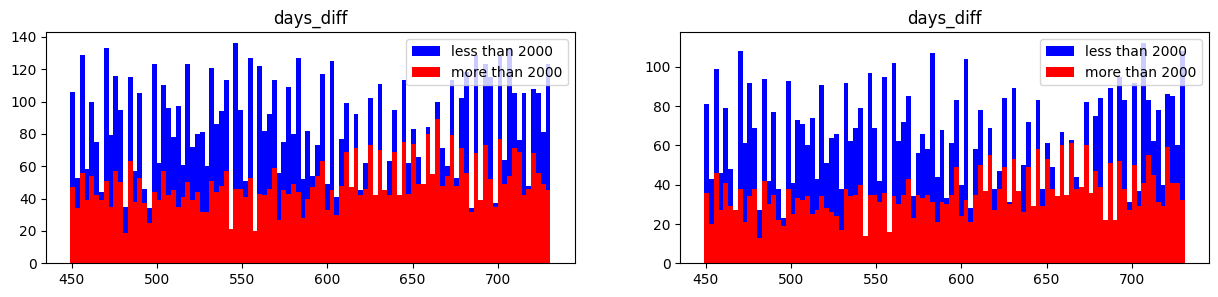

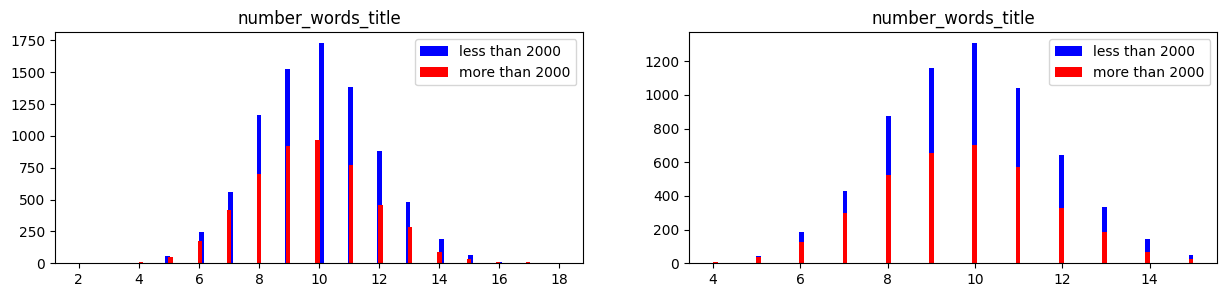

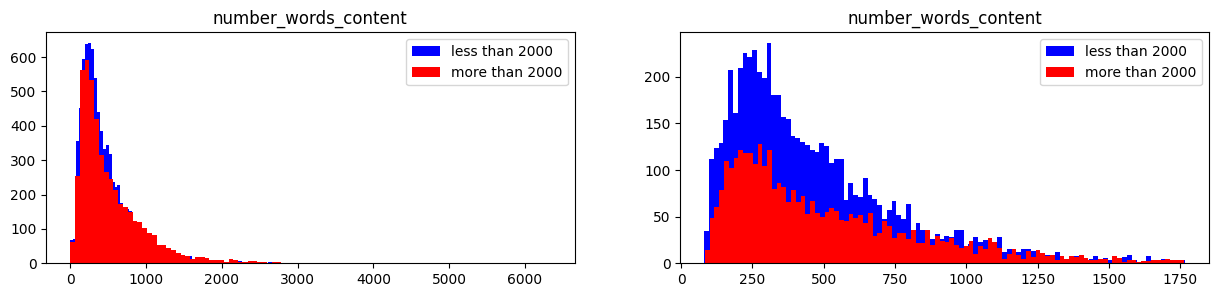

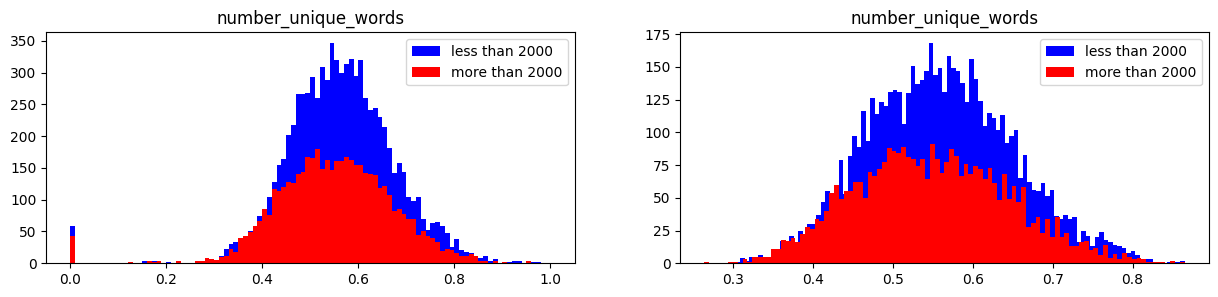

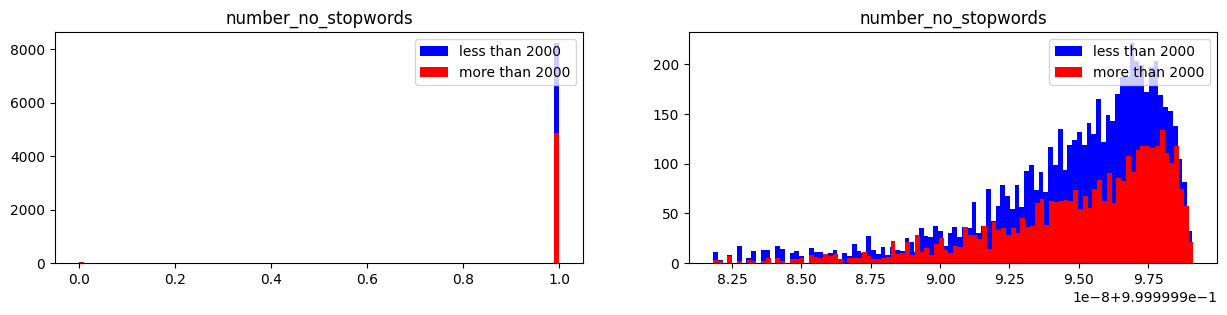

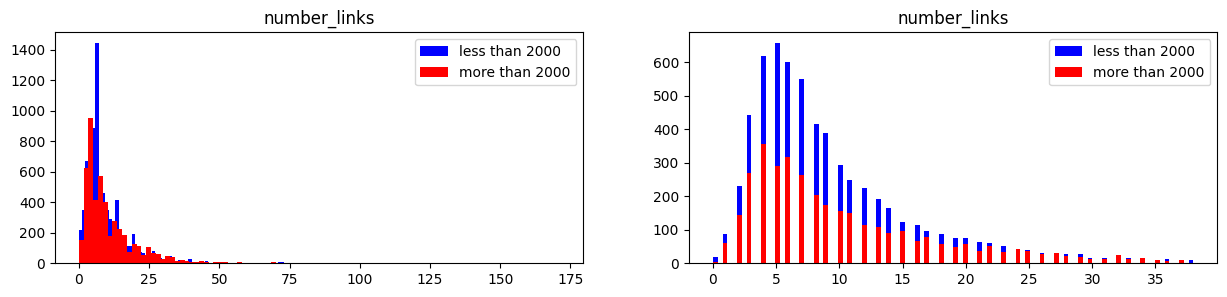

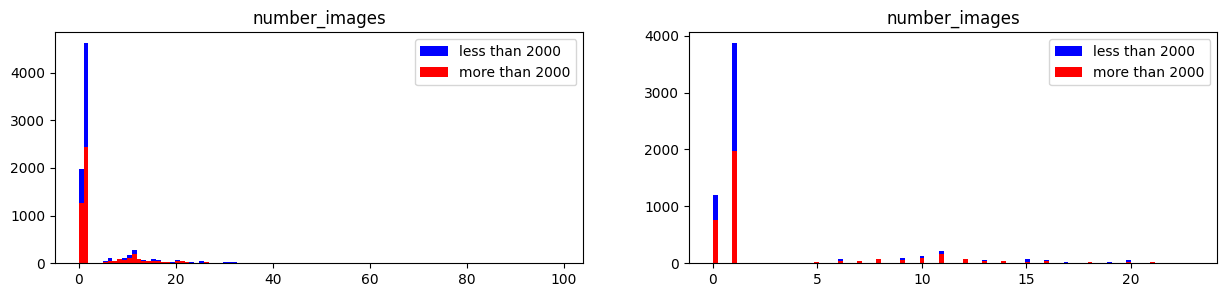

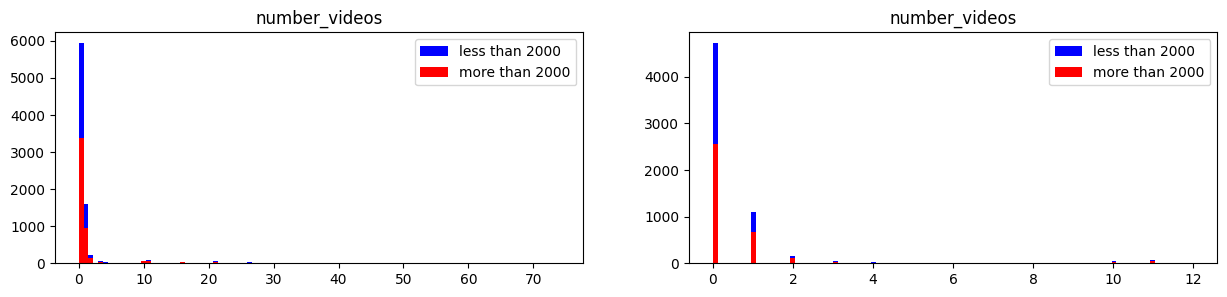

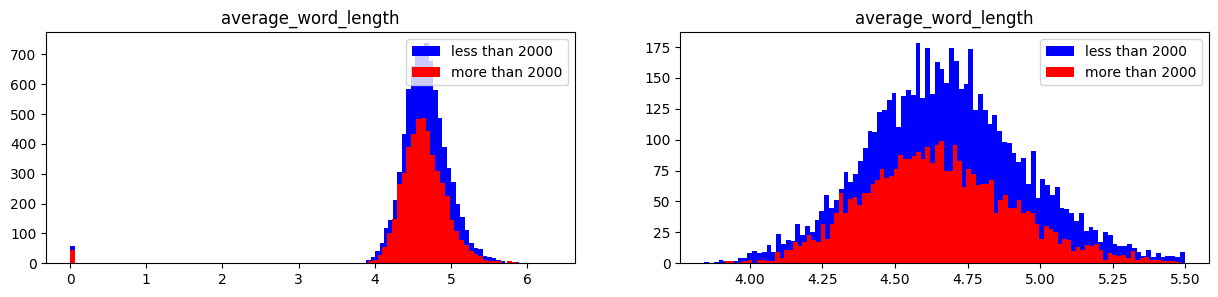

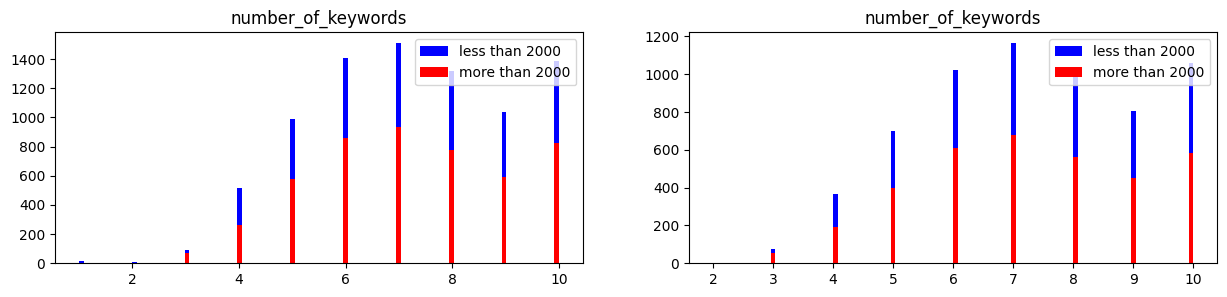

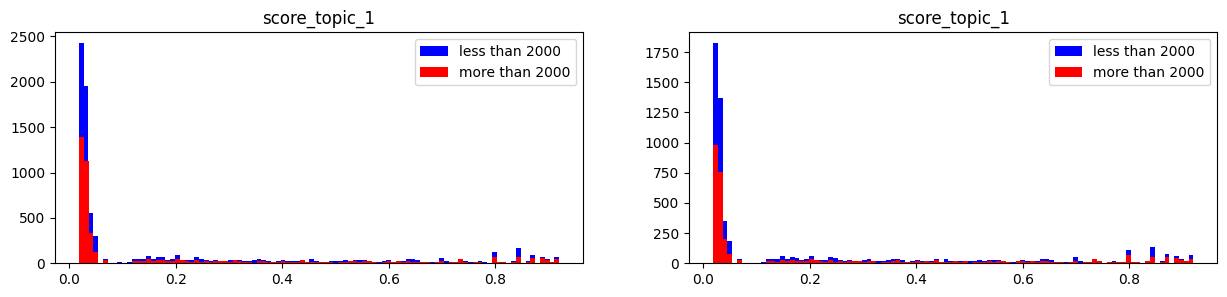

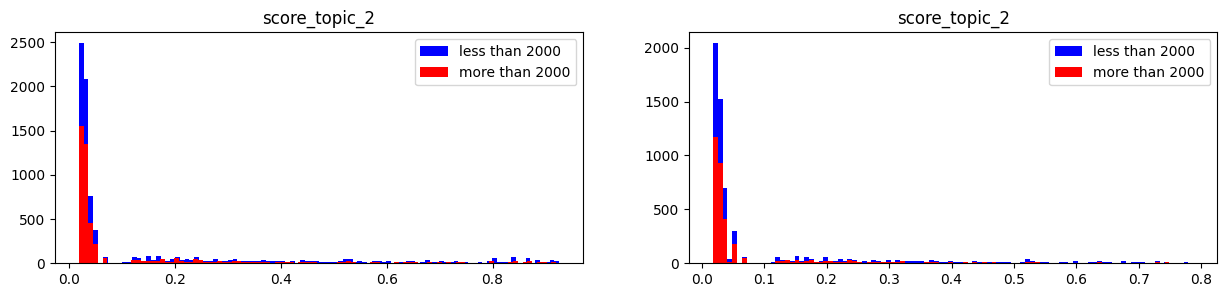

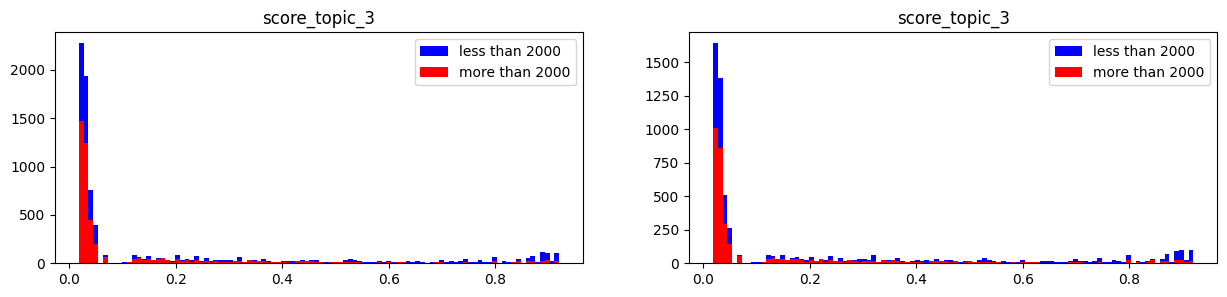

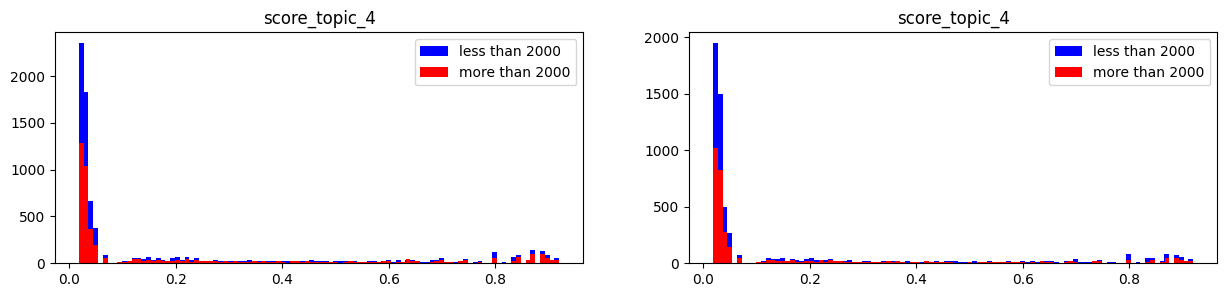

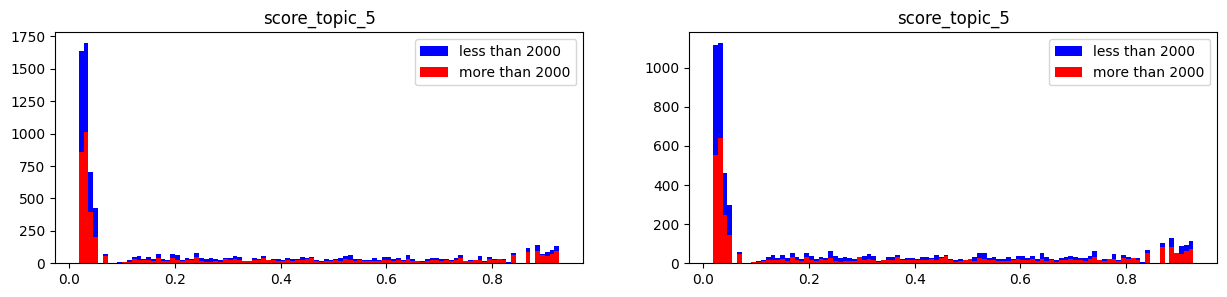

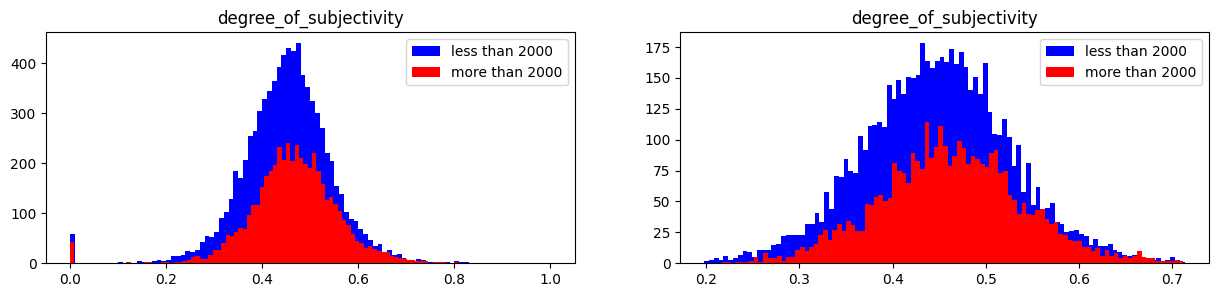

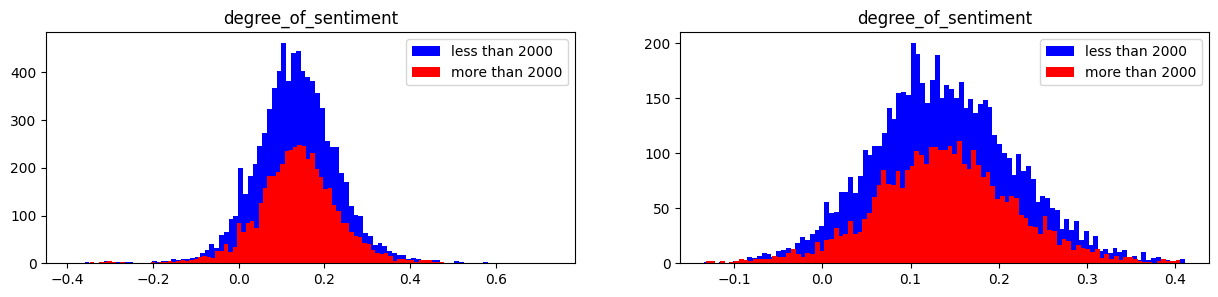

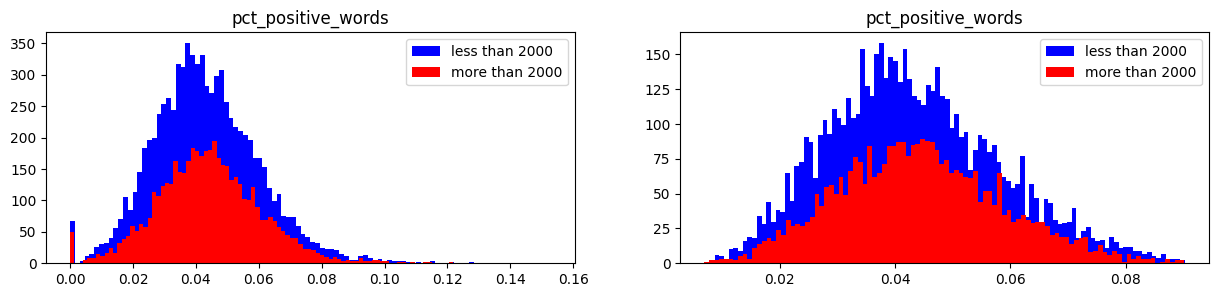

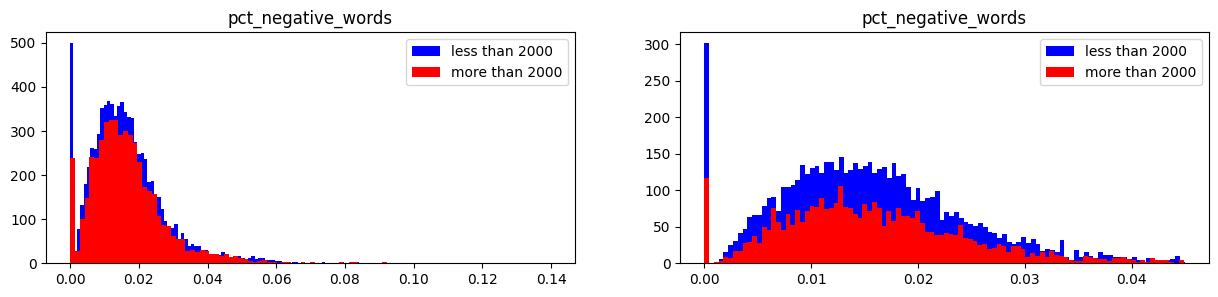

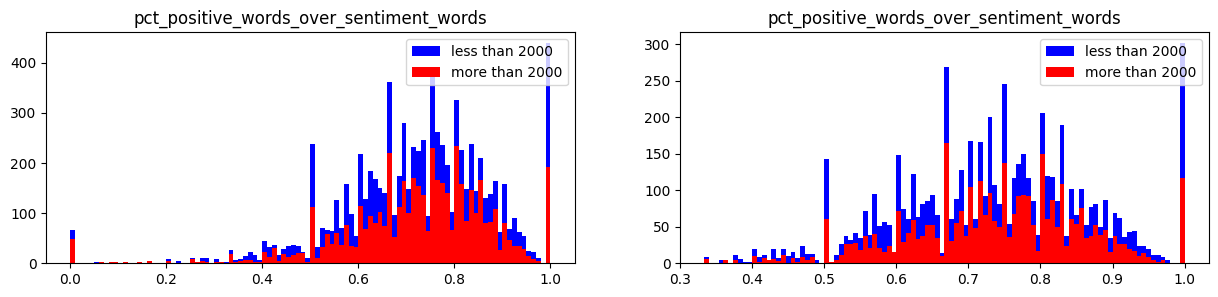

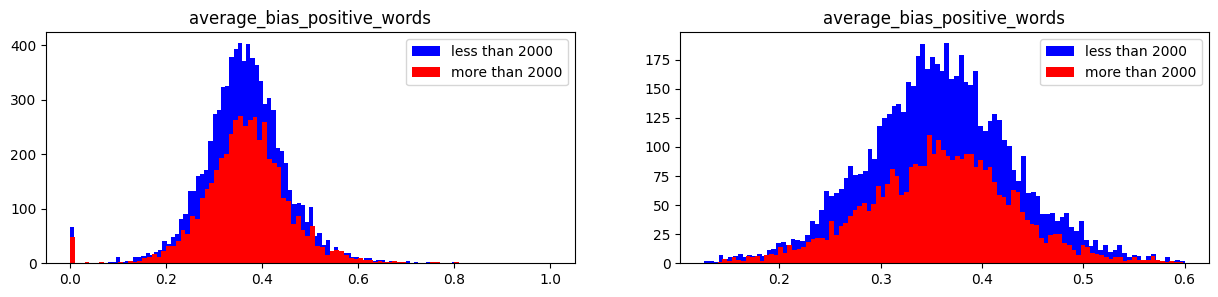

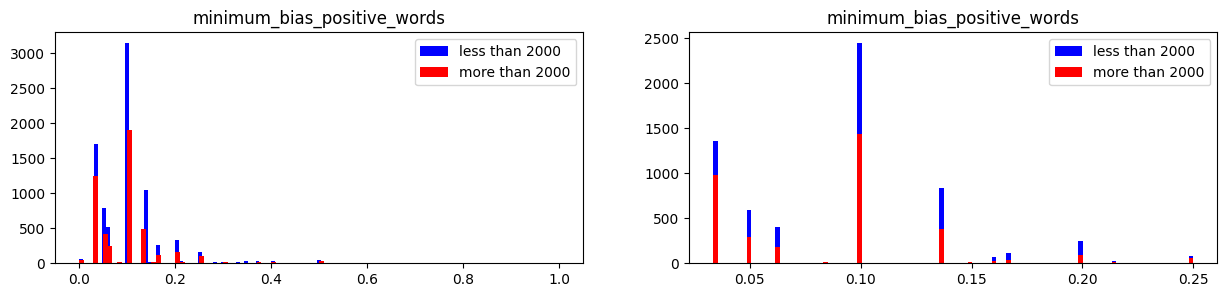

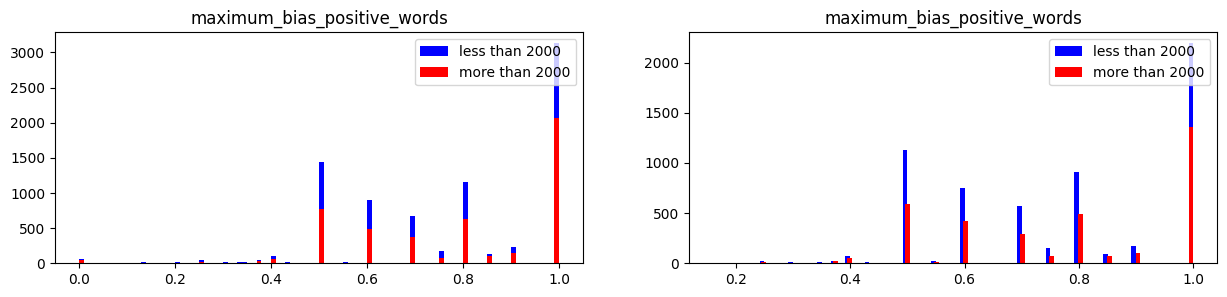

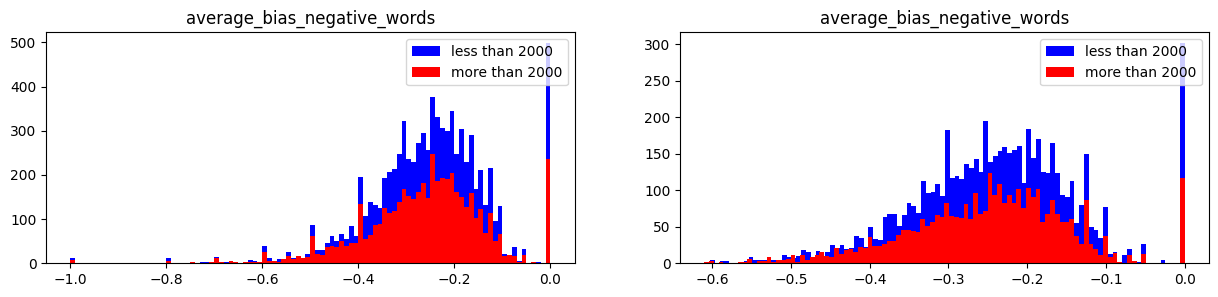

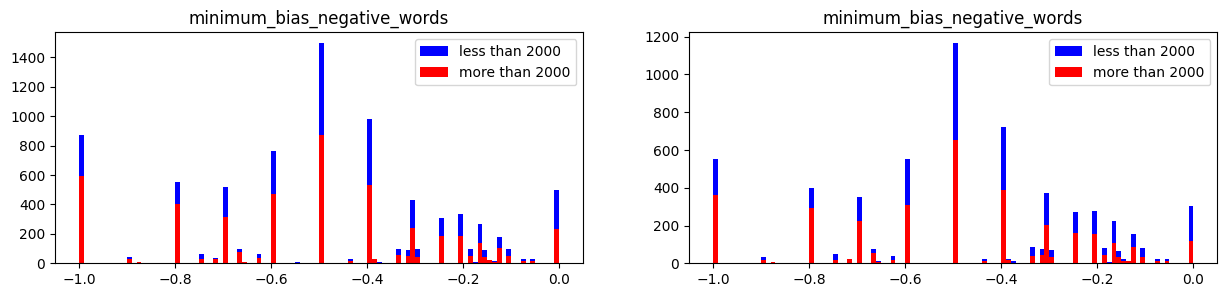

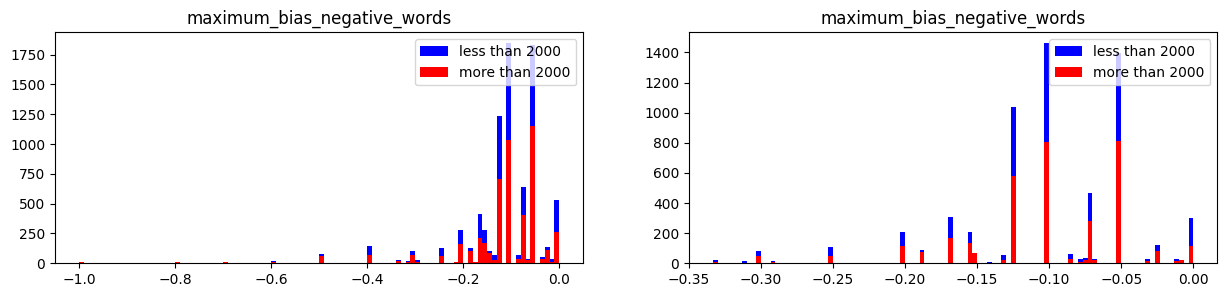

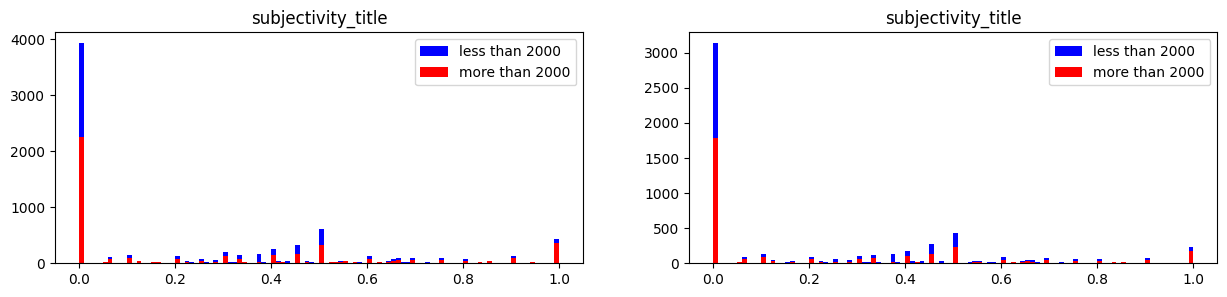

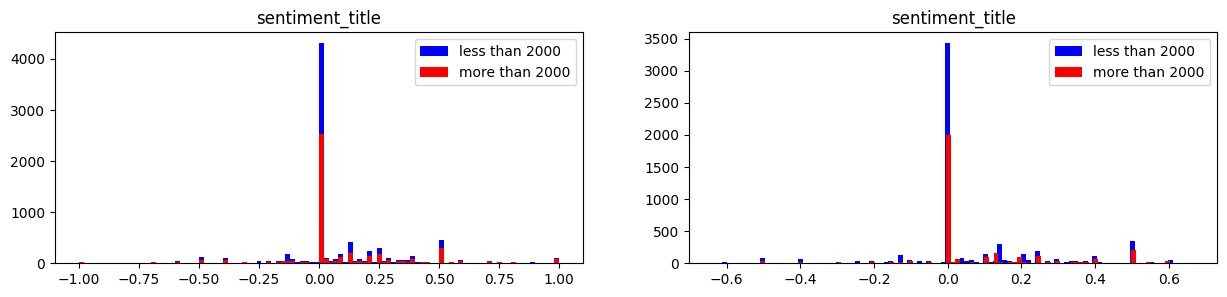

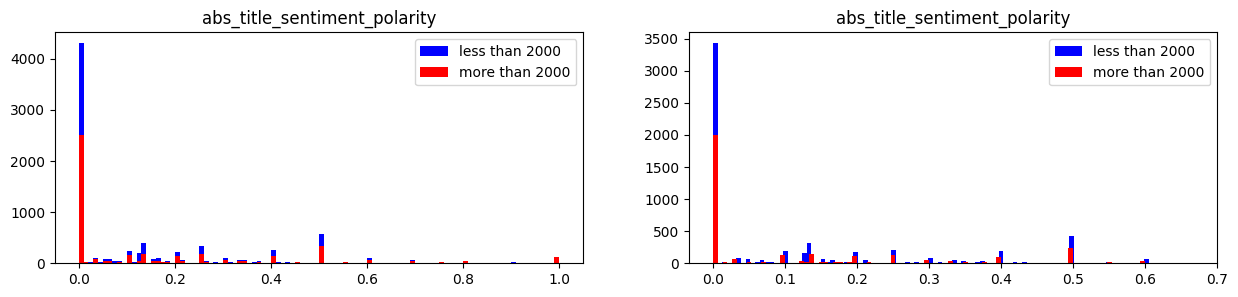

In [10]:
# Histograms for each numeric features
%matplotlib inline
# hist = df[numeric_features].hist(bins=30, sharey=True, figsize=(22, 22))
print("Comparison of the histograms for each numeric feature with and without outliers")
#create histograms for each numeric feature where the target is 0 in blue and 1 in red
for col in numeric_features:
    #create two subplots for each numeric feature
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 3))

    #plot the histogram for the first subplot
    ax1.hist(df.loc[df['views'] < 2000, col], bins=100, alpha=1, label='less than 2000', color='blue')
    ax1.hist(df.loc[df['views'] >= 2000, col], bins=100, alpha=1, label='more than 2000' , color='red')
    ax1.legend(loc='upper right')
    ax1.set_title(col)

    ax2.hist(df2.loc[df2['views'] < 2000, col], bins=100, alpha=1, label='less than 2000', color='blue')
    ax2.hist(df2.loc[df2['views'] >= 2000, col], bins=100, alpha=1, label='more than 2000' , color='red')
    ax2.legend(loc='upper right')
    ax2.set_title(col)
    plt.show()


### Data Normalization

- Normalice the data using the MinMaxScaler method to set the data between 0 and 1.

In [14]:
# for each numeric feature normalize the data
from sklearn.preprocessing import MinMaxScaler

#create a scaler and normalize the numeric features between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))

#funtion to normalize the numeric features and plot the histograms before and after normalization
def runNorm(df3):
    df3[numeric_features] = scaler.fit_transform(df2[numeric_features])
    print("Normalization of the numeric features")
    #uncomment the following lines to plot the histograms before and after normalization
    # for col in numeric_features:
    #     #create two subplots for each numeric feature
    #     fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 3))
    #     #plot the histogram for the first subplot
    #     ax1.hist(df2[col], bins=100, alpha=1, label='before normalization', color='blue')
    #     ax1.legend(loc='upper right')
    #     ax1.set_title(col)
    #     #plot the boxplot for the second subplot
    #     ax2.hist(df3[col], bins=100, alpha=1, label='after normalization', color='green')
    #     ax2.legend(loc='upper right')
    #     ax2.set_title(col)
    #     plt.show()

try:
    df3 = df2.copy()
    runNorm(df3)
except:
    print("the outliers are not removed yet")



Normalization of the numeric features


### 4 - Analyze and Preprocessing categorical variables

the categorical features are:  ['weekday', 'category']
The unique values for weekday are: ['monday' 'tuesday' 'wednesday' 'thursday' 'friday' 'saturday' 'sunday']
Number of unique values for weekday is 7
Number of missing values for weekday is 0


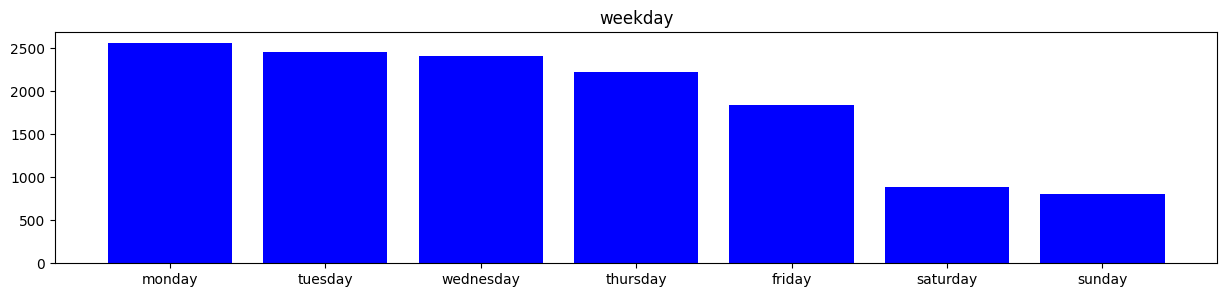

The unique values for category are: ['tech' 'world' 'bus' 'entertainment' 'other' 'lifestyle' 'socmed']
Number of unique values for category is 7
Number of missing values for category is 0


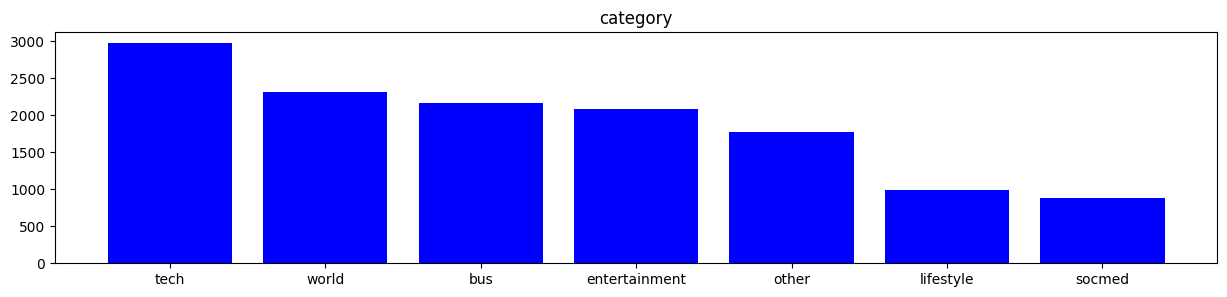

In [15]:
print("the categorical features are: ", categorical_features)

for col in categorical_features:
    print(f"The unique values for {col} are: {df[col].unique()}")
    print(f"Number of unique values for {col} is {df[col].nunique()}")
    print(f"Number of missing values for {col} is {df[col].isnull().sum()}")
    #plot the bar chart for each categorical feature
    fig, ax = plt.subplots(figsize=(15, 3))
    ax.bar(df[col].unique(), df[col].value_counts(), color='blue')
    ax.set_title(col)
    plt.show()

In [16]:
# use one hot encoding for the categorical features and get the new column names
from sklearn.preprocessing import OneHotEncoder

# create an instance of the one hot encoder
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

# fit the one hot encoder to the categorical features
ohe.fit(df[categorical_features])

# get the new column names
new_categorical_features = ohe.get_feature_names(categorical_features)

# transform the categorical features
df4 = pd.DataFrame(ohe.transform(df[categorical_features]), columns=new_categorical_features)

# add the new columns to the dataframe
dataset = pd.concat([df, df4], axis=1)

# drop the original categorical features
dataset = dataset.drop(categorical_features, axis=1)

print("The new dataframe has {} rows and {} columns".format(dataset.shape[0], dataset.shape[1]))
print("The features are: ", dataset.columns)      
# check the new dataframe
feature_cols = [x for x in dataset.columns.tolist() if x not in id_cols + other_cols + [target_col]]

dataset[feature_cols].head()




The new dataframe has 13186 rows and 45 columns
The features are:  Index(['ID', 'days_diff', 'number_words_title', 'number_words_content',
       'number_unique_words', 'number_no_stopwords', 'number_links',
       'number_images', 'number_videos', 'average_word_length',
       'number_of_keywords', 'score_topic_1', 'score_topic_2', 'score_topic_3',
       'score_topic_4', 'score_topic_5', 'degree_of_subjectivity',
       'degree_of_sentiment', 'pct_positive_words', 'pct_negative_words',
       'pct_positive_words_over_sentiment_words',
       'average_bias_positive_words', 'minimum_bias_positive_words',
       'maximum_bias_positive_words', 'average_bias_negative_words',
       'minimum_bias_negative_words', 'maximum_bias_negative_words',
       'subjectivity_title', 'sentiment_title', 'abs_title_sentiment_polarity',
       'views', 'weekday_friday', 'weekday_monday', 'weekday_saturday',
       'weekday_sunday', 'weekday_thursday', 'weekday_tuesday',
       'weekday_wednesday', 'categ

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,days_diff,number_words_title,number_words_content,number_unique_words,number_no_stopwords,number_links,number_images,number_videos,average_word_length,number_of_keywords,...,weekday_thursday,weekday_tuesday,weekday_wednesday,category_bus,category_entertainment,category_lifestyle,category_other,category_socmed,category_tech,category_world
0,731,11,1089,0.418692,1.0,20,20,0,4.694215,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,731,12,682,0.459542,1.0,10,1,0,4.620235,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,731,8,397,0.624679,1.0,11,1,0,5.445844,6,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,731,5,356,0.618234,1.0,3,12,1,4.471910,10,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,731,6,174,0.691860,1.0,0,1,0,4.798851,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0



### 5 - Analyze and Preprocessing the target variable

1 - Binarize target variable, 1 if more than 2000 visits, 0 otherwise.

2 - We check the proportion of the data of the objective variable, to see if it is a balanced or unbalanced classification problem.


In [17]:
#use the data from the previous step
try:
    df = dataset.copy()
except:
    print("Please run the previous steps first")

# binarize target column
if df[target_col].unique().shape[0] > 2:
    df[target_col] = df[target_col].apply(lambda x: 1 if x > 2000 else 0)
else:
    pass

# check target column proportion
print("Description of the target column: \n")
print(df[target_col].value_counts(normalize=True))


Description of the target column: 

0    0.647277
1    0.352723
Name: views, dtype: float64



- We visually verified the distribution of the target variable.

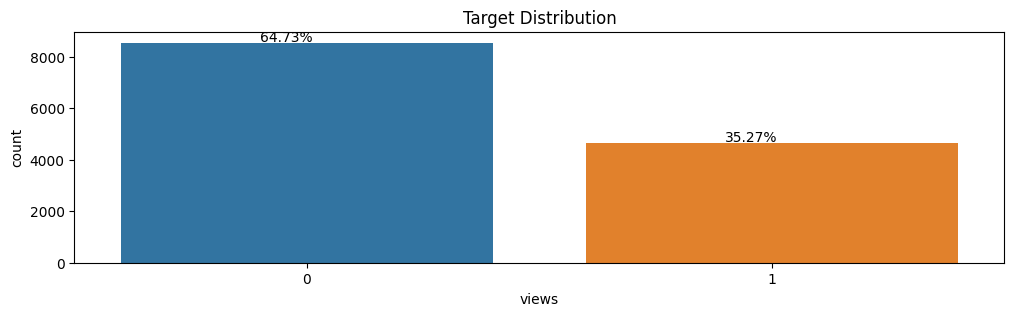

In [18]:
#plot of the target column

plt.figure(figsize=(12,3))
ax = sns.countplot(x=target_col, data=df)
plt.title('Target Distribution')
# add annotations 
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100*p.get_height()/len(df)), (p.get_x()+0.3, p.get_height()+50))

plt.show()

### As the data is not balanced, we will use the SMOTE method to balance the data.


Description of the target column after SMOTE: 

0    0.5
1    0.5
Name: views, dtype: float64
The new dataframe has 17070 rows and 43 columns


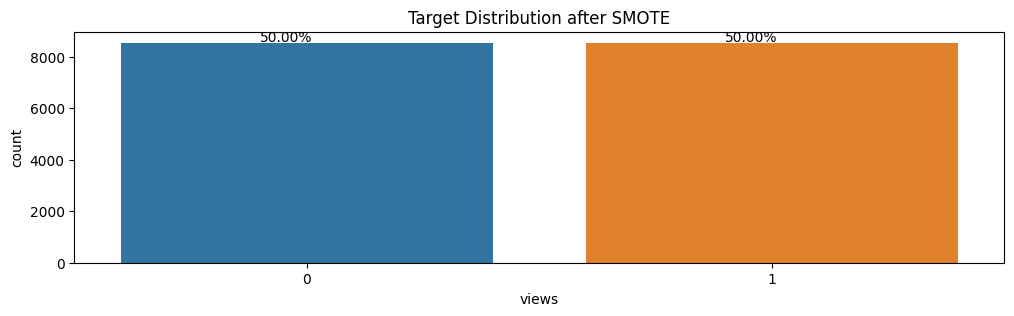

In [19]:
#SMOTE to balance the dataset

from imblearn.over_sampling import SMOTE

# create an instance of SMOTE
smote = SMOTE(random_state=42)

feature_cols = new_categorical_features.tolist() + numeric_features

# fit the SMOTE to the dataset
X_sm, y_sm = smote.fit_resample(df[feature_cols], df[target_col])

# check the new target column proportion
print("Description of the target column after SMOTE: \n")
print(pd.Series(y_sm).value_counts(normalize=True))

print("The new dataframe has {} rows and {} columns".format(X_sm.shape[0], X_sm.shape[1]))

#plot of the target column after SMOTE

plt.figure(figsize=(12,3))
ax = sns.countplot(x=y_sm)
plt.title('Target Distribution after SMOTE')
# add annotations
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100*p.get_height()/len(y_sm)), (p.get_x()+0.3, p.get_height()+50))

plt.show()

### 7 - Feature Selection

1 - Numeric variables

2 - Categorical variables

### 1 - Numeric variables

In [20]:
numeric_features

target_col = 'views'

X = X_sm
y = y_sm

Text(0.5, 1.0, 'Correlation between the features and the target column')

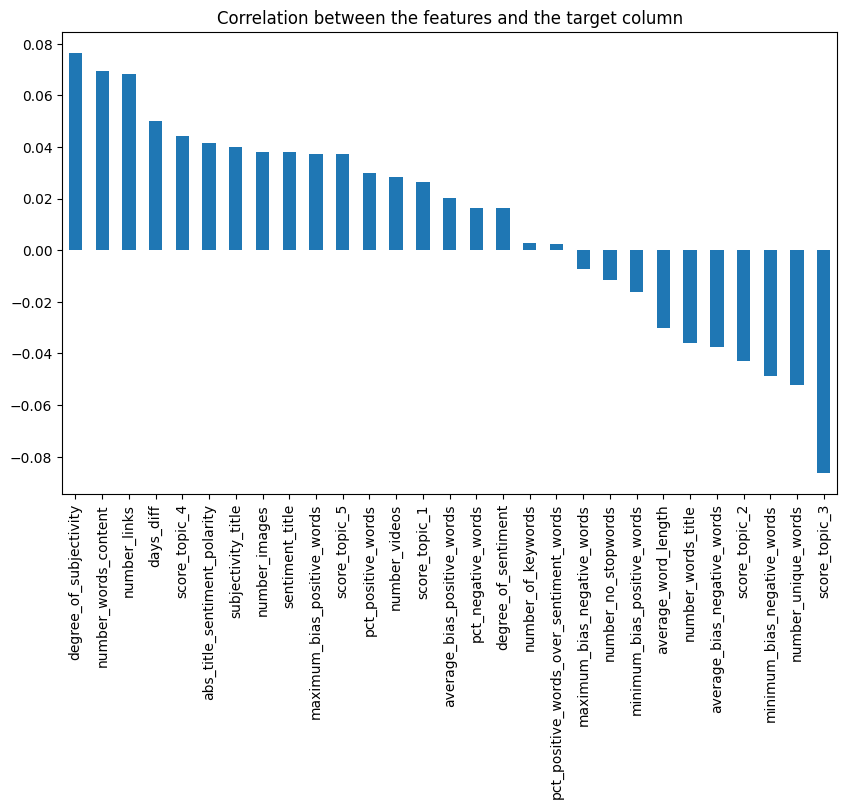

In [22]:
#calculate the correlation between the features and the target column

correlations = df[numeric_features + [target_col]].corr()[target_col][:-1].sort_values(ascending=False)

#plot the correlations from highest to lowest

correlations.plot.bar(figsize=(10, 6))
#add title
plt.title('Correlation between the features and the target column')

Text(0.5, 1.0, 'Feature Importance')

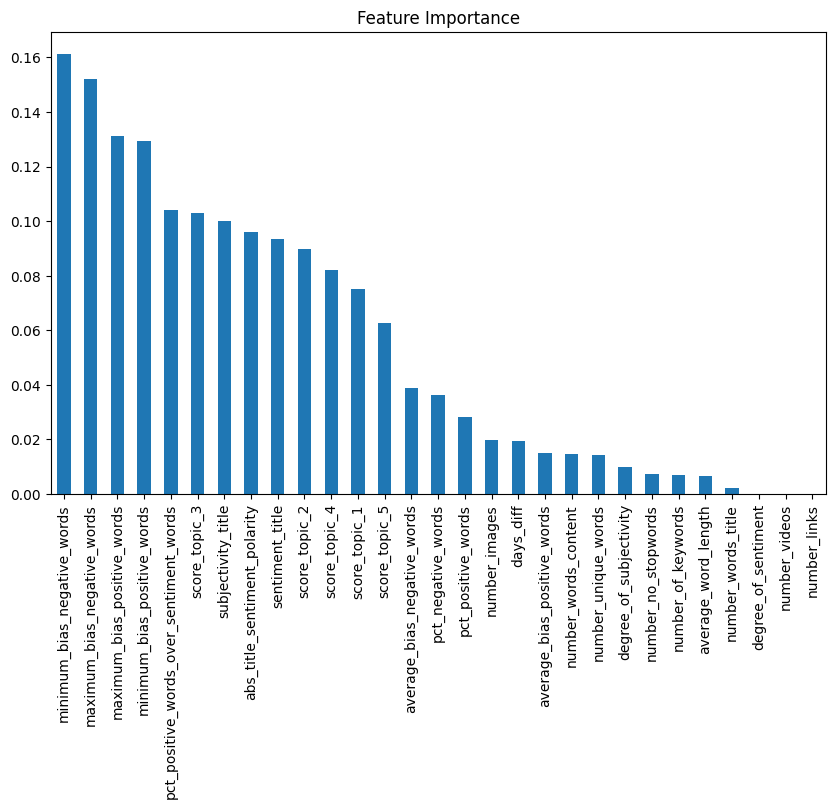

In [23]:
### Feature Selection

from sklearn.feature_selection import mutual_info_classif

# calculate mutual information

mi = mutual_info_classif(X[numeric_features], y)

#plot the mutual information from highest to lowest

mi = pd.Series(mi)
mi.index = X[numeric_features].columns
mi.sort_values(ascending=False, inplace=True)
mi.plot.bar(figsize=(10, 6))
#add title
plt.title('Feature Importance')

In [54]:
#select the features with more than 0.001 mutual information

selected_features = mi[mi > 0.001].index
selected_features.value_counts().sum()

print(f"the numeric features after feature selection are {len(numeric_features)} and then number of features is {len(selected_features)}")

no_importance_features = [x for x in numeric_features if x not in selected_features]

print(f"the numeric features with no importance are {no_importance_features}")



the numeric features after feature selection are 29 and then number of features is 28
the numeric features with no importance are ['degree_of_sentiment']


### 2 - Categorical variables

In [55]:
categorical_features

new_categorical_features


array(['weekday_friday', 'weekday_monday', 'weekday_saturday',
       'weekday_sunday', 'weekday_thursday', 'weekday_tuesday',
       'weekday_wednesday', 'category_bus', 'category_entertainment',
       'category_lifestyle', 'category_other', 'category_socmed',
       'category_tech', 'category_world'], dtype=object)

In [58]:
#split the data into train and test sets

from sklearn.model_selection import train_test_split

#total_features = new_categorical_features.tolist() + numeric_features #0.744
total_features = new_categorical_features.tolist() + selected_features.tolist() #0.744

print(total_features)

X_train, X_test, y_train, y_test = train_test_split(X[total_features], y, test_size=0.25, random_state=0)

print("The shape of the train set is: ", X_train.shape)
print("The shape of the test set is: ", X_test.shape)

['weekday_friday', 'weekday_monday', 'weekday_saturday', 'weekday_sunday', 'weekday_thursday', 'weekday_tuesday', 'weekday_wednesday', 'category_bus', 'category_entertainment', 'category_lifestyle', 'category_other', 'category_socmed', 'category_tech', 'category_world', 'minimum_bias_negative_words', 'maximum_bias_negative_words', 'minimum_bias_positive_words', 'maximum_bias_positive_words', 'subjectivity_title', 'score_topic_3', 'pct_positive_words_over_sentiment_words', 'sentiment_title', 'abs_title_sentiment_polarity', 'score_topic_2', 'score_topic_4', 'score_topic_1', 'score_topic_5', 'pct_negative_words', 'average_bias_negative_words', 'pct_positive_words', 'number_images', 'days_diff', 'average_bias_positive_words', 'number_unique_words', 'number_words_content', 'degree_of_subjectivity', 'number_of_keywords', 'number_videos', 'average_word_length', 'number_words_title', 'number_links', 'number_no_stopwords']
The shape of the train set is:  (12802, 42)
The shape of the test set is

In [59]:
#random forest model

from sklearn.ensemble import RandomForestClassifier

# create an instance of the random forest classifier
rf = RandomForestClassifier()

# cross validate the model
from sklearn.model_selection import cross_val_score

# calculate the cross validation score

cv_score = cross_val_score(rf, X_train, y_train, cv=5)

print("The cross validation scores are: ", cv_score)

print("The cross validation score is: ", cv_score.mean())


The cross validation scores are:  [0.74267864 0.7575166  0.73828125 0.75546875 0.74023438]
The cross validation score is:  0.746835922247169


### 8 - Save the preprocessed dataset

In [61]:
#save the dataframe to a csv file

dataset = X[total_features]
dataset['views'] = y

dataset.to_csv('../src/data/processed/dataset.csv', index=False)

#save columns names to json

import json

with open('../src/data/processed/features.json', 'w') as f:
    json.dump(total_features, f)